In [ ]:
!pip install h5py
!pip install matplotlib
!pip install seaborn



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install scikit-learn



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install mne


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import h5py
import os
import matplotlib.pyplot as plt
import mne 

# Data Analysis

In [5]:
def get_dataset_name(filename_with_dir):
    filename_without_dir = filename_with_dir.split('/')[-1]
    temp = filename_without_dir.split('_')[:-1]
    dataset_name = '_'.join(temp)  
    return dataset_name

filename_path = '/Users/danielgeurts/Desktop/Final Project data/Intra/train'


with h5py.File(filename_path, 'r') as f:
    dataset_name = get_dataset_name(filename_path)
    matrix = f.get(dataset_name)[()]
    print(type(matrix))
    print(matrix.shape)


IsADirectoryError: [Errno 21] Unable to open file (file read failed: time = Wed Jun  4 12:18:01 2025
, filename = '/Users/danielgeurts/Desktop/Final Project data/Intra/train', file descriptor = 73, errno = 21, error message = 'Is a directory', buf = 0x16d673900, total read size = 8, bytes this sub-read = 8, bytes actually read = 18446744073709551615, offset = 0)

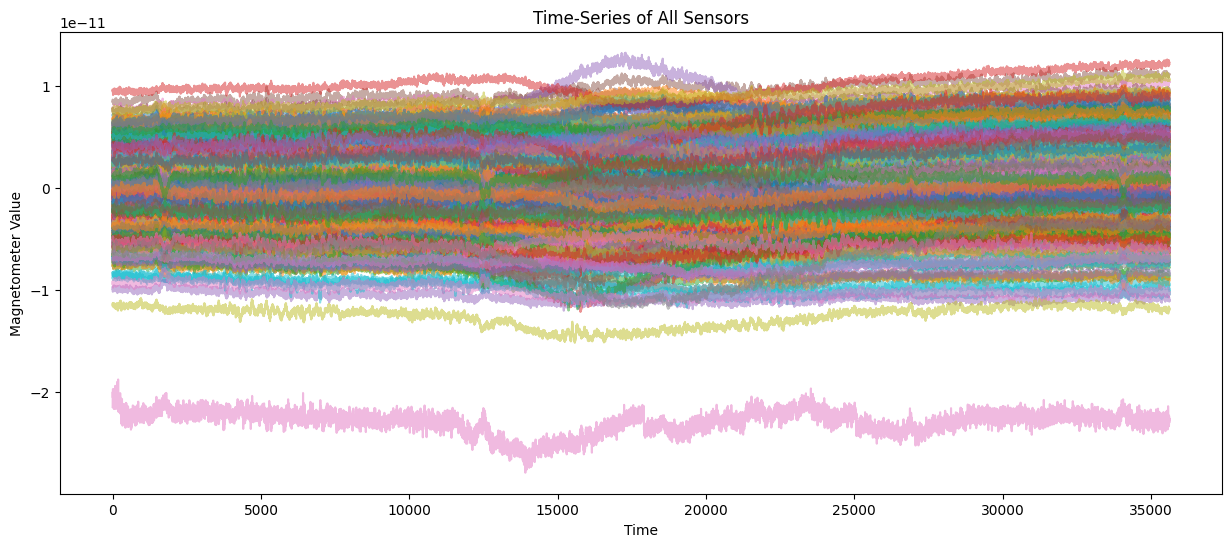

In [6]:
plt.figure(figsize=(15, 6))

for i in range(matrix.shape[0]):  # 248 sensors (rows)
    plt.plot(matrix[i], alpha=0.5)  # `alpha` adds transparency to avoid overlap

plt.xlabel('Time')
plt.ylabel('Magnetometer Value')
plt.title('Time-Series of All Sensors')
plt.show()


In [3]:
data_dir = '/Users/danielgeurts/Desktop/Final Project data/Intra/train'

# File listing
files = [f for f in os.listdir(data_dir) if f.endswith('.h5')]

# Preallocate lists
raws = []     # MNE Raw objects
labels = []   # Task labels

# Constants
sfreq = 2034  # Hz >> for downsampling later
n_channels = 248 # channel = sensor
ch_names = [f'MEG {i:03d}' for i in range(n_channels)]
ch_types = ['mag'] * n_channels
info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=ch_types)

# extract full task label (e.g., task_motor, rest)
def get_task_label(filename):
    parts = filename.split('_')
    if parts[0] == 'rest':
        return 'rest'
    elif parts[0] == 'task':
        label_parts = []
        for part in parts[1:]:
            if part.isdigit():
                break
            label_parts.append(part)
        return '_'.join(label_parts)
    else:
        return 'unknown'


# extract dataset name inside HDF5 file
def get_dataset_name(filename):
    return '_'.join(filename.split('_')[:-1])

# Loop through files
for fname in sorted(files):
    fpath = os.path.join(data_dir, fname)
    task_label = get_task_label(fname)

    with h5py.File(fpath, 'r') as f:
        dataset_name = get_dataset_name(fname)
        data = f[dataset_name][()]  # shape: (248, 35624)

    # Create MNE Raw object
    raw = mne.io.RawArray(data, info)

    # Store
    raws.append(raw)
    labels.append(task_label)


Creating RawArray with float64 data, n_channels=248, n_times=35624
    Range : 0 ... 35623 =      0.000 ...    17.514 secs
Ready.
Creating RawArray with float64 data, n_channels=248, n_times=35624
    Range : 0 ... 35623 =      0.000 ...    17.514 secs
Ready.
Creating RawArray with float64 data, n_channels=248, n_times=35624
    Range : 0 ... 35623 =      0.000 ...    17.514 secs
Ready.
Creating RawArray with float64 data, n_channels=248, n_times=35624
    Range : 0 ... 35623 =      0.000 ...    17.514 secs
Ready.
Creating RawArray with float64 data, n_channels=248, n_times=35624
    Range : 0 ... 35623 =      0.000 ...    17.514 secs
Ready.
Creating RawArray with float64 data, n_channels=248, n_times=35624
    Range : 0 ... 35623 =      0.000 ...    17.514 secs
Ready.
Creating RawArray with float64 data, n_channels=248, n_times=35624
    Range : 0 ... 35623 =      0.000 ...    17.514 secs
Ready.
Creating RawArray with float64 data, n_channels=248, n_times=35624
    Range : 0 ... 35623

In [4]:
print(f"Number of recordings: {len(raws)}")
print(f"Unique tasks: {set(labels)}")
print(f"Info: {raw.info}")
data, times = raw[:, :]  # shape: (n_channels, n_times)
print("Min value:", data.min())
print("Max value:", data.max())


Number of recordings: 32
Unique tasks: {'working_memory', 'story_math', 'rest', 'motor'}
Info: <Info | 7 non-empty values
 bads: []
 ch_names: MEG 000, MEG 001, MEG 002, MEG 003, MEG 004, MEG 005, MEG 006, ...
 chs: 248 Magnetometers
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 1017.0 Hz
 meas_date: unspecified
 nchan: 248
 projs: []
 sfreq: 2034.0 Hz
>
Min value: -1.6864036556096806e-10
Max value: 1.735352139764501e-11


Effective window size : 1.007 (s)
Plotting power spectral density (dB=True).


/var/folders/rf/074j5lkj4hj8ksyhmt_vyf840000gn/T/ipykernel_4069/162555123.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.compute_psd(fmax=125).plot(picks="data", amplitude=False)
/opt/anaconda3/lib/python3.12/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


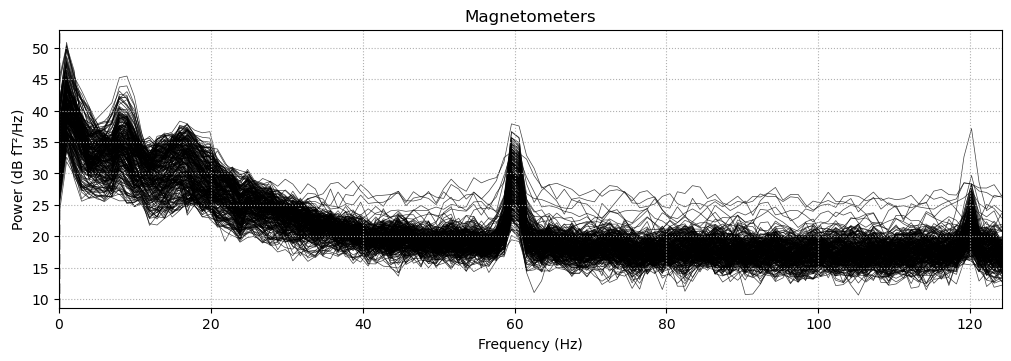

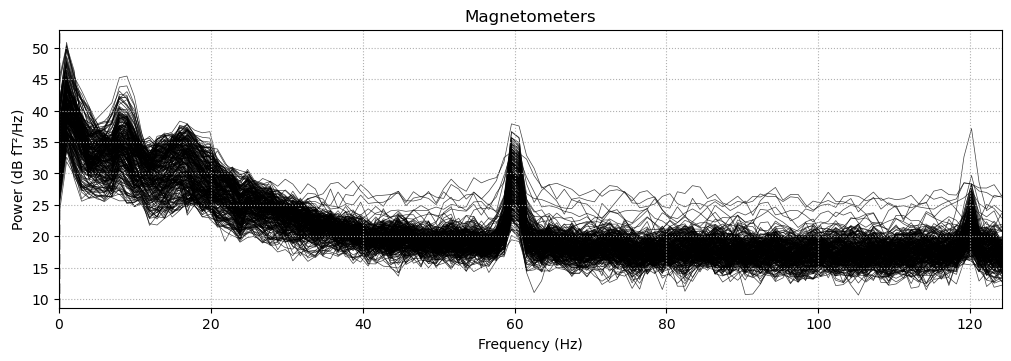

In [5]:
raw.compute_psd(fmax=125).plot(picks="data", amplitude=False)


Plotting task: rest
Using matplotlib as 2D backend.


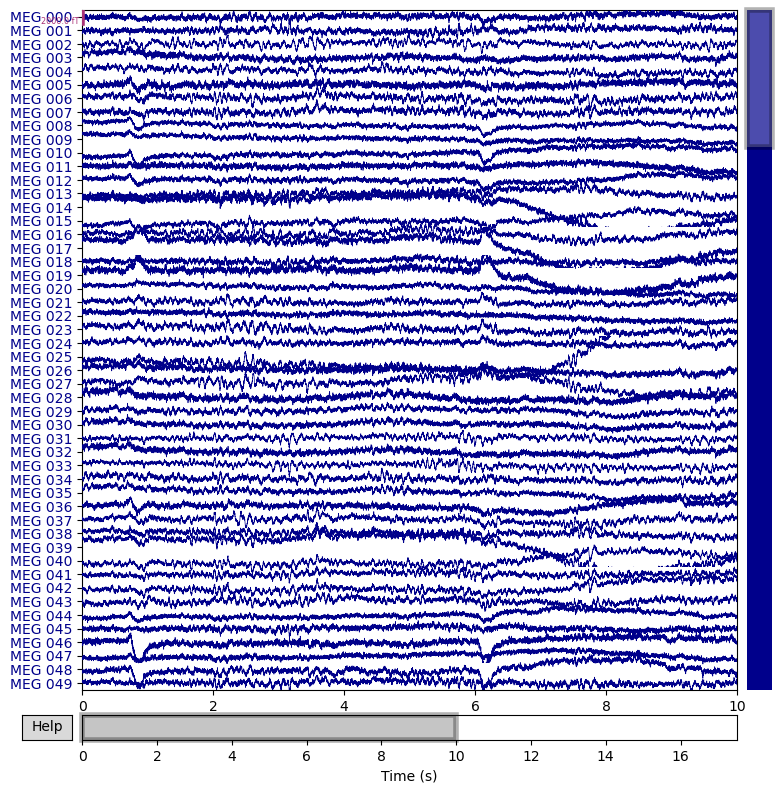

Plotting task: motor


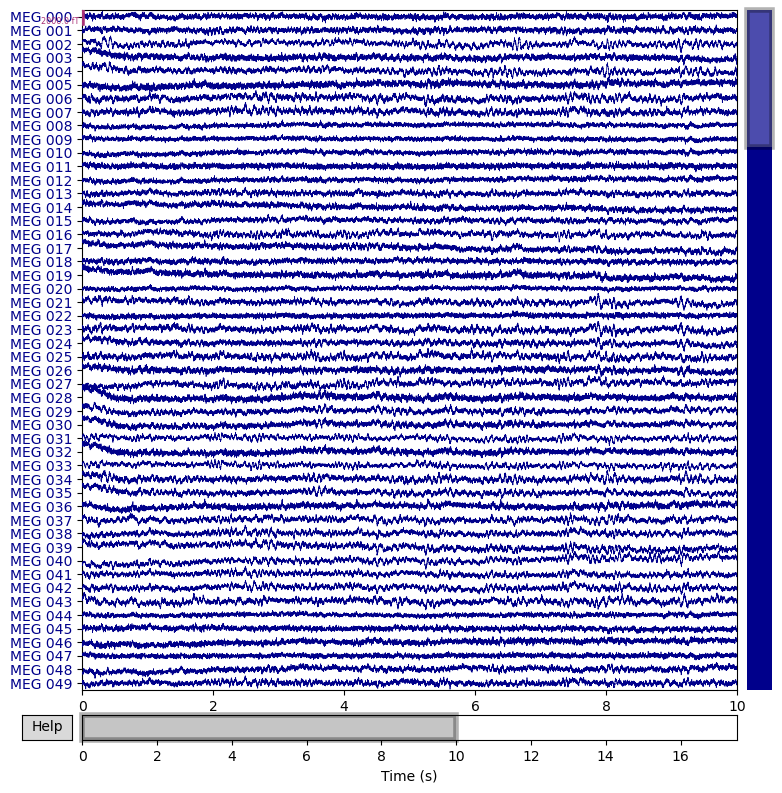

Plotting task: story_math


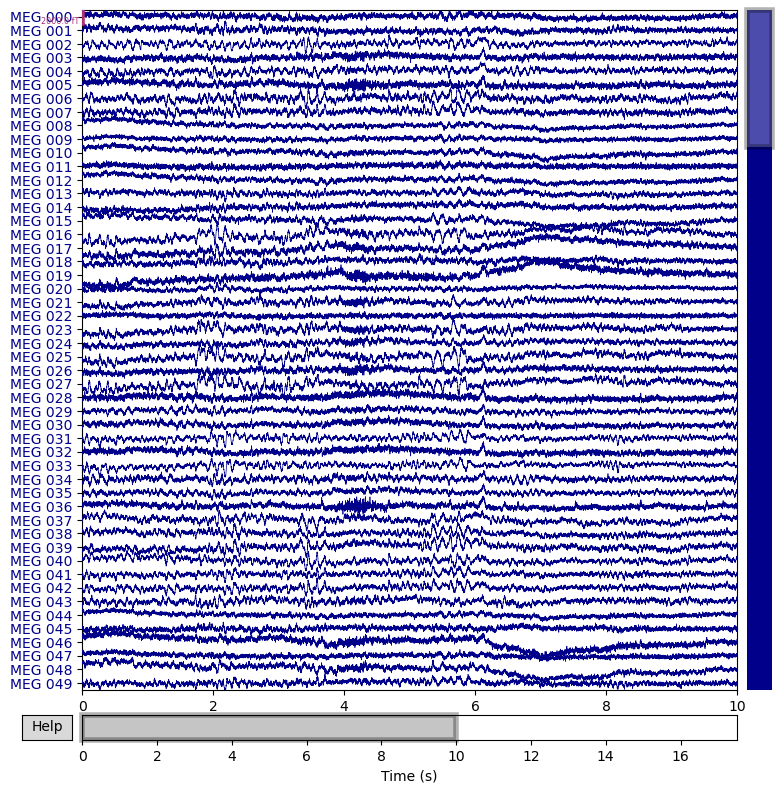

Plotting task: working_memory


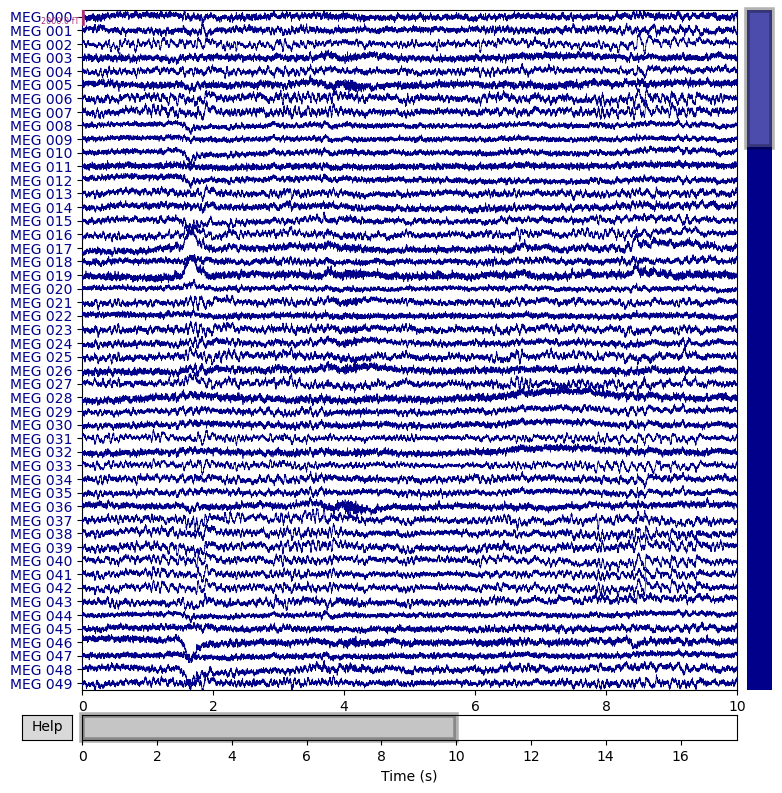

In [6]:
from collections import defaultdict

# Group raw objects by task
task_to_raws = defaultdict(list)
for raw, label in zip(raws, labels):
    task_to_raws[label].append(raw)

# Plot each task group 
for task, raw_list in task_to_raws.items():
    print(f"Plotting task: {task}")
    # First trail each task
    raw_list[0].plot(n_channels=50, title=f'Task: {task}')


# Data Preprocessing

## Data Downsampling

From 2k Hz to 250Hz. (Look Google Doc why)

In [7]:
resampled_raws = []
for raw in raws:
    raw_resampled = raw.copy().resample(250, verbose=False)
    resampled_raws.append(raw_resampled)

In [8]:
print(raw_resampled.info)

<Info | 7 non-empty values
 bads: []
 ch_names: MEG 000, MEG 001, MEG 002, MEG 003, MEG 004, MEG 005, MEG 006, ...
 chs: 248 Magnetometers
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: unspecified
 nchan: 248
 projs: []
 sfreq: 250.0 Hz
>


Effective window size : 8.192 (s)
Plotting power spectral density (dB=True).


/var/folders/rf/074j5lkj4hj8ksyhmt_vyf840000gn/T/ipykernel_4069/1373144648.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw_resampled.compute_psd(fmax=125).plot(picks="data", amplitude=False)
/opt/anaconda3/lib/python3.12/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


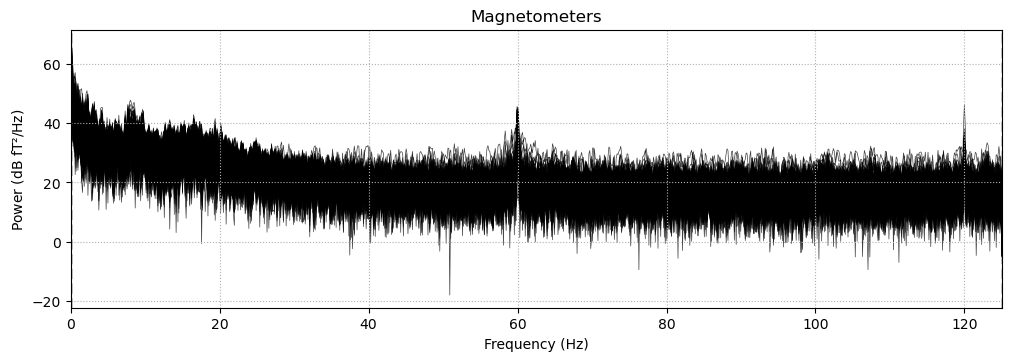

In [9]:
raw_resampled.compute_psd(fmax=125).plot(picks="data", amplitude=False)


Plotting task: rest


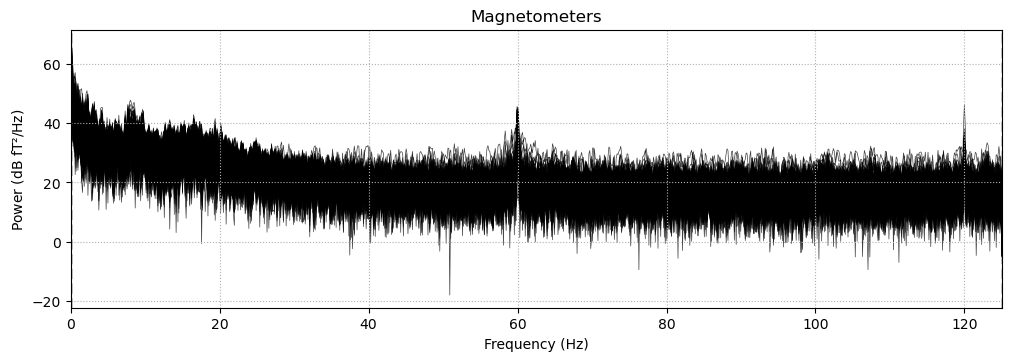

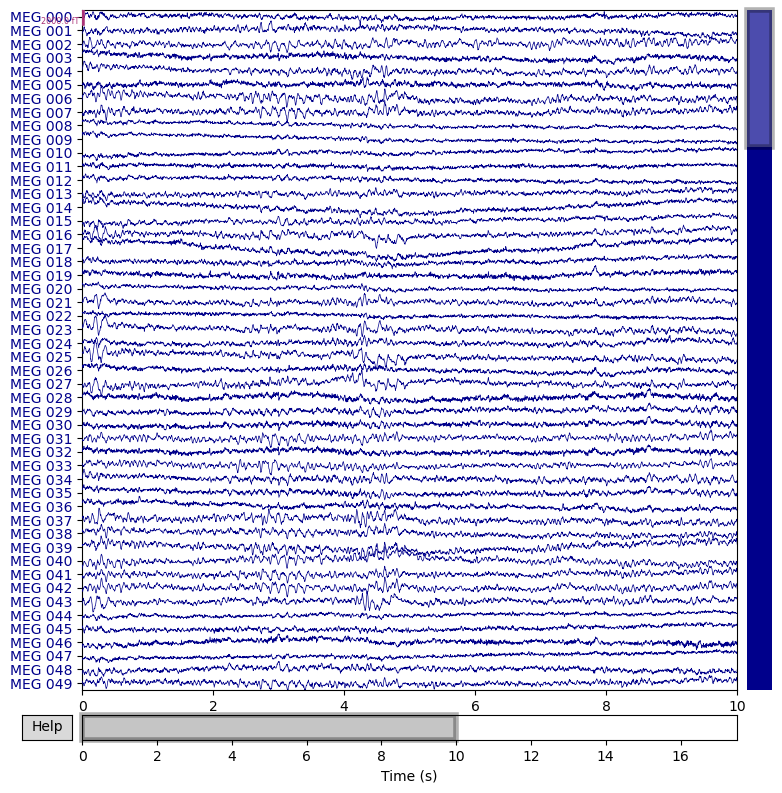

Plotting task: motor


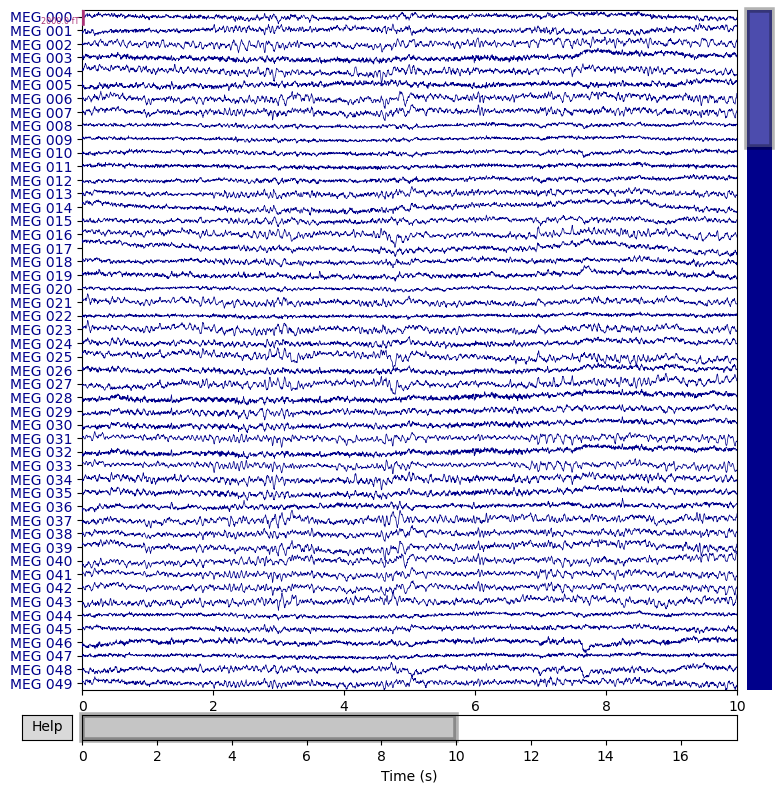

Plotting task: story_math


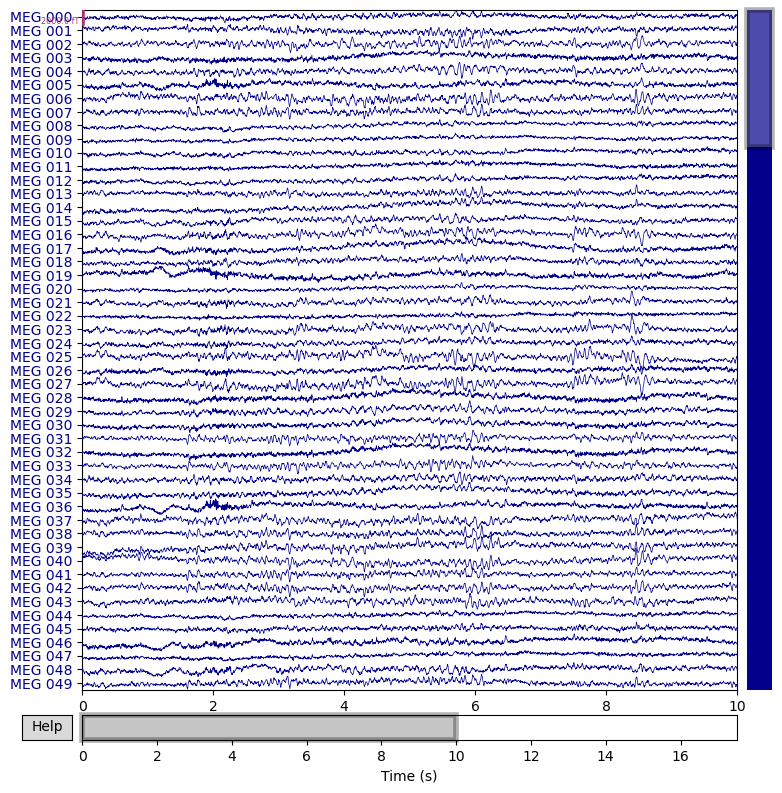

Plotting task: working_memory


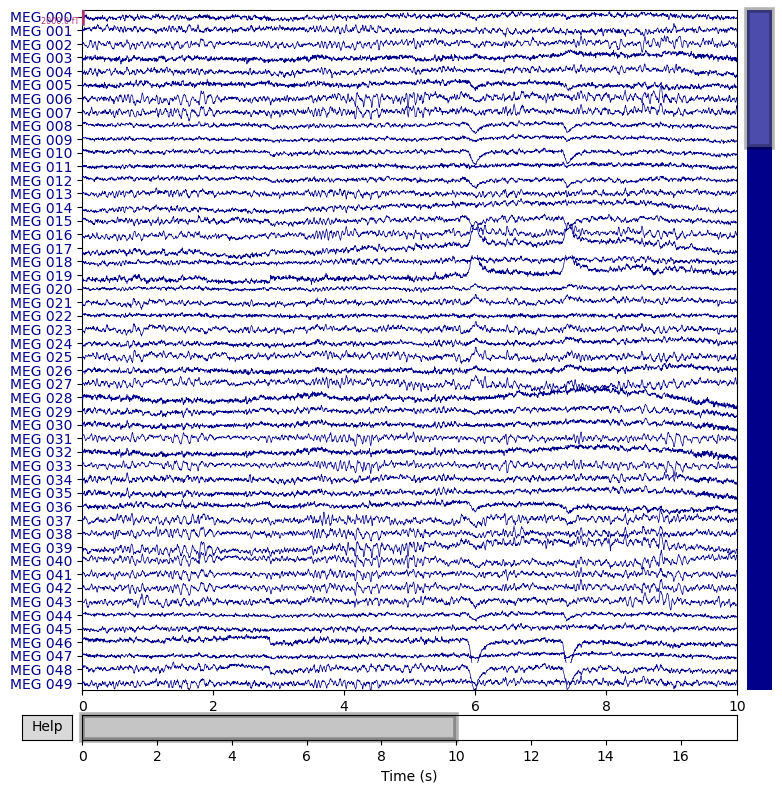

In [10]:
from collections import defaultdict

# Group resampled raw objects by task
task_to_raws = defaultdict(list)
for resampled, label in zip(resampled_raws, labels):  # <-- use resampled_raws here
    task_to_raws[label].append(resampled)

# Plot each task group
for task, raw_list in task_to_raws.items():
    print(f"Plotting task: {task}")
    # Plot the third trial (index 2) of each task if it exists
    if len(raw_list) > 2:
        raw_list[2].plot(n_channels=50, title=f'Task: {task}')


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
import numpy as np
import mne

le = LabelEncoder()
y = le.fit_transform(labels) 

X = resampled_raws 

skf = StratifiedKFold(n_splits=8, shuffle=True, random_state=42)

for fold, (train_idx, test_idx) in enumerate(skf.split(X, y)):
    print(f"\n=== Fold {fold + 1} ===")
    
    X_train = [X[i] for i in train_idx]
    X_test  = [X[i] for i in test_idx]
    y_train = [y[i] for i in train_idx]
    y_test  = [y[i] for i in test_idx]
    
    print("Train label counts:", {label: y_train.count(label) for label in set(y)})
    print("Test label counts :", {label: y_test.count(label) for label in set(y)})


    X_train_np = np.stack([raw.get_data() for raw in X_train]) 
    X_test_np  = np.stack([raw.get_data() for raw in X_test])  

 
    mean = X_train_np.mean(axis=(0, 2), keepdims=True) 
    std  = X_train_np.std(axis=(0, 2), keepdims=True) 

    X_train_scaled = (X_train_np - mean) / std
    X_test_scaled  = (X_test_np - mean) / std 




=== Fold 1 ===
Train label counts: {0: 7, 1: 7, 2: 7, 3: 7}
Test label counts : {0: 1, 1: 1, 2: 1, 3: 1}

=== Fold 2 ===
Train label counts: {0: 7, 1: 7, 2: 7, 3: 7}
Test label counts : {0: 1, 1: 1, 2: 1, 3: 1}

=== Fold 3 ===
Train label counts: {0: 7, 1: 7, 2: 7, 3: 7}
Test label counts : {0: 1, 1: 1, 2: 1, 3: 1}

=== Fold 4 ===
Train label counts: {0: 7, 1: 7, 2: 7, 3: 7}
Test label counts : {0: 1, 1: 1, 2: 1, 3: 1}

=== Fold 5 ===
Train label counts: {0: 7, 1: 7, 2: 7, 3: 7}
Test label counts : {0: 1, 1: 1, 2: 1, 3: 1}

=== Fold 6 ===
Train label counts: {0: 7, 1: 7, 2: 7, 3: 7}
Test label counts : {0: 1, 1: 1, 2: 1, 3: 1}

=== Fold 7 ===
Train label counts: {0: 7, 1: 7, 2: 7, 3: 7}
Test label counts : {0: 1, 1: 1, 2: 1, 3: 1}

=== Fold 8 ===
Train label counts: {0: 7, 1: 7, 2: 7, 3: 7}
Test label counts : {0: 1, 1: 1, 2: 1, 3: 1}


In [ ]:

train_mean_check = X_train_scaled.mean(axis=(0, 2)) 
train_std_check  = X_train_scaled.std(axis=(0, 2))

print(train_mean_check)
print(train_std_check)

test_mean_check = X_test_scaled.mean(axis=(0, 2))
test_std_check  = X_test_scaled.std(axis=(0, 2))

print(test_mean_check)
print(test_std_check)



Train mean per channel (should be ≈ 0):
[-4.52477545e-16 -1.85441617e-17  2.96706587e-17 -2.22529940e-17
  1.20537051e-17 -2.22529940e-16  8.20579155e-17  5.00692366e-17
  8.15943115e-17  3.70883234e-17  0.00000000e+00 -2.78162426e-17
  4.45059881e-17  7.41766468e-17  3.70883234e-17 -1.92859282e-16
  8.90119762e-17  2.41074102e-17  1.11264970e-17 -9.27208085e-17
  1.13119386e-16 -2.22529940e-17 -1.44644461e-16  5.19236528e-17
  9.64296408e-17  5.19236528e-17 -1.92859282e-16 -1.78023952e-16
 -1.33517964e-16  1.26100300e-16 -5.93413174e-17 -5.05328406e-17
  1.48353294e-16  1.18682635e-16 -1.11264970e-16 -3.33794911e-17
 -5.56324851e-17  1.21000655e-16 -3.10614708e-17  1.22391467e-16
  1.48353294e-17  1.40935629e-16 -3.65088183e-17  2.29020397e-16
  1.85441617e-17  4.45059881e-17  5.93413174e-17 -5.56324851e-17
  5.93413174e-17 -1.48353294e-17 -2.33656437e-16 -1.09410554e-16
 -4.17243638e-17  9.27208085e-18  1.85441617e-17 -1.85441617e-17
  1.42790045e-16 -5.93413174e-17  7.04678145e-17 

## Data Epoching


In [11]:
event_id = {
    'motor': 1,
    'working_memory': 2,
    'story_math': 3,
    'rest': 4
}


In [12]:
import numpy as np

In [13]:
#print(labels)

In [15]:
# Event code mapping
event_id = {
    'motor': 1,
    'working_memory': 2,
    'story_math': 3,
    'rest': 4
}

# Desired epoch length in seconds (e.g., 2-second chunks)
epoch_duration = 2.0  

# This list will store the final Epochs objects (each one corresponding to a trial or sub-trial).
all_epochs = [] 

# Create epochs from resampled raw files and labels
for raw, label in zip(resampled_raws, labels):  # Iterates over resampled raw MEG recordings and their task labels.

    # Compute epoch start points in samples
    sfreq = raw.info['sfreq']  # sampling frequency
    n_samples = raw.n_times
    samples_per_epoch = int(epoch_duration * sfreq)

    # Create multiple events spaced by epoch_duration
    start_samples = np.arange(0, n_samples - samples_per_epoch + 1, samples_per_epoch)
    events = np.array([[start, 0, event_id[label]] for start in start_samples])

    this_event_id = {label: event_id[label]}  # Select the specific event ID for this label (e.g., {‘motor’: 1}).

    # Creates epochs of fixed length within the raw file.
    epoch = mne.Epochs(
        raw,
        events=events,
        event_id=this_event_id,
        tmin=0,
        tmax=epoch_duration,  # duration of each chunk
        baseline=None,
        preload=True
    )
    all_epochs.append(epoch)

# After this loop, all_epochs contains MNE Epochs objects for each trial, 
# split into multiple sub-epochs of the specified duration, labeled with the task, using resampled data.


Not setting metadata
8 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 8 events and 501 original time points ...
0 bad epochs dropped
Not setting metadata
8 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 8 events and 501 original time points ...
0 bad epochs dropped
Not setting metadata
8 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 8 events and 501 original time points ...
0 bad epochs dropped
Not setting metadata
8 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 8 events and 501 original time points ...
0 bad epochs dropped
Not setting metadata
8 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 8 events and 501 original time points ...
0 bad epoch

In [16]:
combined_epochs = mne.concatenate_epochs(all_epochs)

# Save or use
print(combined_epochs)
combined_epochs.save('epochs_combined-epo.fif', overwrite=True)

Not setting metadata
256 matching events found
No baseline correction applied
<EpochsArray | 256 events (all good), 0 – 2 s (baseline off), ~242.9 MiB, data loaded,
 'rest': 64
 'motor': 64
 'story_math': 64
 'working_memory': 64>


[PosixPath('/Users/danielgeurts/Downloads/epochs_combined-epo.fif')]

In [17]:
print(X.shape)


NameError: name 'X' is not defined

256: total number of epochs across all trials,  64 per trial

248: number of MEG channels

501: number of time points per epoch > 2s x 250Hz

In [18]:
n_epochs_total = X.shape[0]
n_trials = len(resampled_raws)
avg_epochs_per_trial = n_epochs_total / n_trials

print(f"Average number of epochs per trial: {avg_epochs_per_trial:.2f}")


NameError: name 'X' is not defined

## Data Scaling 

Z-score normalization using mne python scaler > mean (average) of 0 and a standard deviation of 1


In [19]:
X = combined_epochs.get_data()  # shape: (n_epochs, n_channels, n_times)

# Im taking each channel
mean = X.mean(axis=(0, 2), keepdims=True)  # shape: (1, n_channels, 1)
std = X.std(axis=(0, 2), keepdims=True)    # shape: (1, n_channels, 1)

# Apply z-scoring
X_scaled = (X - mean) / std


In [20]:
import numpy as np

print(np.mean(X_scaled, axis=(0, 2)))
print(np.std(X_scaled, axis=(0, 2)))


[ 1.96782045e-16  4.84199064e-16 -5.18547281e-17  8.44744545e-16
  2.22487808e-16 -3.88245657e-16  1.59774611e-16  5.08796819e-16
  4.35889958e-16  1.62212226e-16  3.72290356e-17  4.61152518e-16
 -9.08565749e-17  1.29415219e-16  3.91791279e-16  3.26640467e-16
  2.15216512e-16  1.12684313e-16  2.18277381e-16 -2.21601402e-17
  2.63262466e-16 -6.59485773e-16  9.63966099e-17 -4.96387141e-17
  8.24357216e-17  4.83091057e-17 -3.54562243e-17 -4.82647854e-16
 -6.02755814e-17 -1.01050239e-16  1.11332544e-15 -5.78158058e-16
  4.43202804e-18  1.36949667e-16  1.21215967e-16 -2.44204745e-16
  3.10241963e-18  9.51778022e-17 -7.35716655e-17 -5.00375966e-16
  1.42711303e-16  6.05858233e-16  3.33191558e-16 -7.18736448e-16
  7.09124487e-18 -3.51903027e-16  4.14837825e-16 -4.53396469e-16
  1.84372367e-16  2.03873290e-17 -2.07418912e-16 -6.29237181e-16
 -4.16499835e-16 -5.89792132e-16 -5.58435533e-17  1.02158246e-16
 -1.59553010e-17 -7.09124487e-17 -1.46700128e-16 -2.30908661e-16
 -1.55564184e-16 -5.47687

In [21]:
print(X_scaled.shape)

(256, 248, 501)


In [24]:
len(raw_resampled)

4379